In [1]:
%matplotlib inline

In [2]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [6]:
data = {'r (kpc)': [0.6, 1.1, 1.9, 2.6, 3.4, 4.3, 4.8, 5.9, 8.5, 9.5, 11.2],
       'v (km/s)': [12.4, 21.9, 37.9, 53.1, 68.0, 82.3, 85.7, 89.5, 95.2, 97.5, 101.1],
       'e (km/s)': [8.6, 6.2, 6.2, 9.5, 6.2, 6.2, 6.3, 15.6, 15.5, 6.2, 10.2]}
data_df = pandas.DataFrame(data)

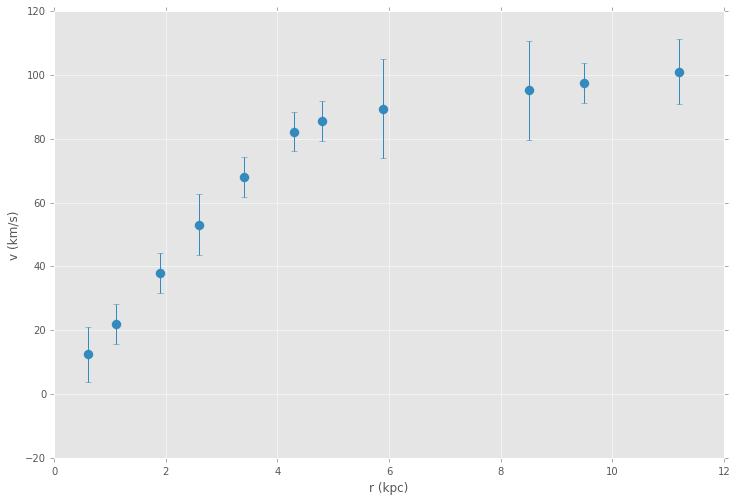

In [12]:
data_df.plot('r (kpc)', 'v (km/s)', 'scatter', yerr='e (km/s)', 
             s=100, figsize=(12,8))

In [14]:
data_df['log(v)'] = np.log(data_df['v (km/s)'])
data_df['log(e)'] = np.log(data_df['e (km/s)'])

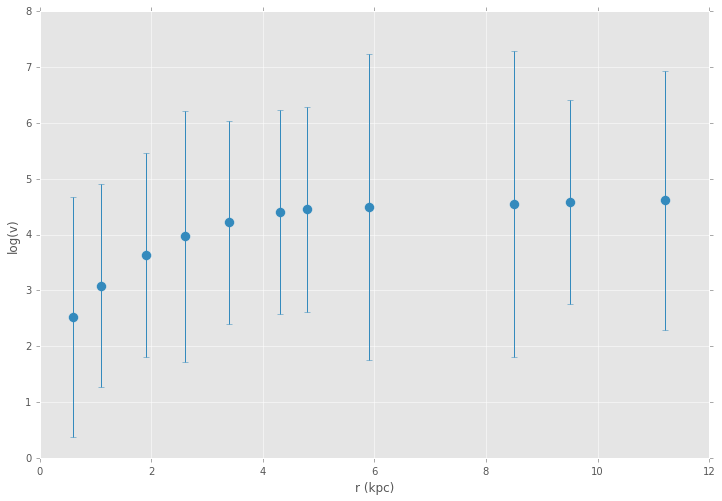

In [15]:
data_df.plot('r (kpc)', 'log(v)', 'scatter', yerr='log(e)', 
             s=100, figsize=(12,8))

In [19]:
import statsmodels.api as sm
X = data_df['r (kpc)']
X = sm.add_constant(X)
y = data_df['v (km/s)']
log_y = data_df['log(v)']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

log_model = sm.OLS(log_y, X)
log_results = log_model.fit()
log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(v)   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     15.16
Date:                Wed, 01 Feb 2017   Prob (F-statistic):            0.00366
Time:                        20:37:12   Log-Likelihood:                -5.6489
No. Observations:                  11   AIC:                             15.30
Df Residuals:                       9   BIC:                             16.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.2864      0.238     13.823      0.000         2.749     3.824
r (kpc)        0.1559      0.040      3.893      0.004         0.065     0.246
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.996
Skew:                          -0.680   Prob(JB):                        0.608
Kurtosis:                       2.430   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               v (km/s)   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     33.32
Date:                Wed, 01 Feb 2017   Prob (F-statistic):           0.000269
Time:                        20:37:18   Log-Likelihood:                -44.579
No. Observations:                  11   AIC:                             93.16
Df Residuals:                       9   BIC:                             93.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         28.7635      8.187      3.513      0.007        10.243    47.284
r (kpc)        7.9591      1.379      5.772      0.000         4.840    11.078
==============================================================================
Omnibus:                        2.264   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                0.895
Skew:                          -0.010   Prob(JB):                        0.639
Kurtosis:                       1.603   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""